In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn. preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
import os

In [109]:
import cv2
import matplotlib.pyplot as plt

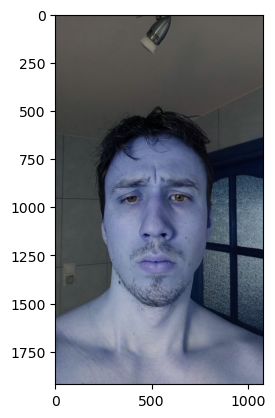

In [110]:
# img = cv2.imread('C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\model\\images_dataset\\Ronaldo\\735216.png')
img = cv2.imread("C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\images_dataset\\ZAdrian\\VID_20240303_120626_005.jpg")
img.shape
plt.imshow(img,)

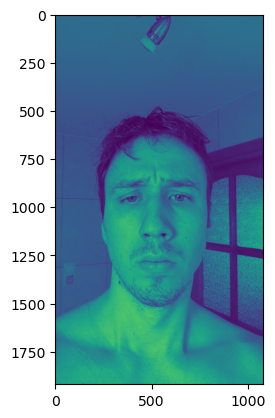

In [111]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

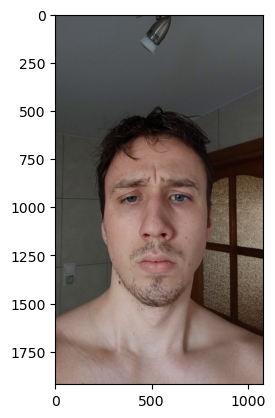

In [112]:
RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(RGB)


In [113]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
path_face = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
path_eyes = os.path.join(cv2_base_dir,'data/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(path_face)
eyes_cascade = cv2.CascadeClassifier(path_eyes)

In [114]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces


array([[136, 631, 795, 795]])

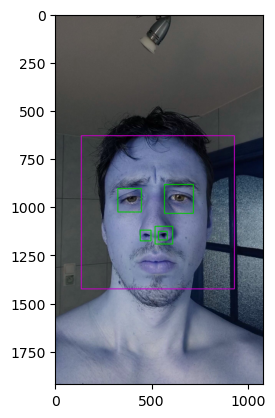

In [115]:
x,y,w,h = faces[0]
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,200),3)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,200,0),3)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

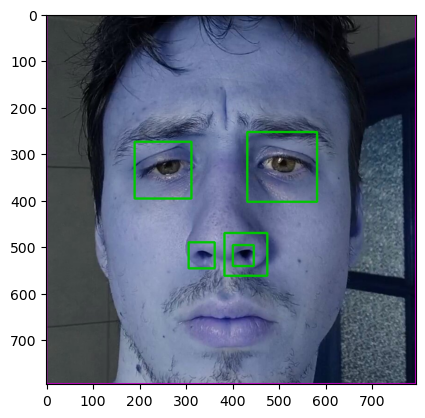

In [116]:
plt.imshow(roi_color)#roi = regoin of interest

In [117]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [118]:
def Get_face_from_picture(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:

            return roi_color

In [119]:
# Croped_picture = Get_face_from_picture("C:\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\images_dataset\\Ronaldo\\best-looks-of-ronaldo-on-his-face-structure.png")
# plt.imshow(Croped_picture)

In [120]:
path_to_dataset = "./images_dataset/"


path_to_cropped_dataset = "./images_dataset/cropped/"

In [121]:
img_dirs = []
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/cropped',
 './images_dataset/Ronaldo',
 './images_dataset/Tyson',
 './images_dataset/ZAdrian']

In [122]:

import shutil
if os.path.exists(path_to_cropped_dataset):
     shutil.rmtree(path_to_cropped_dataset)
os.mkdir(path_to_cropped_dataset)

In [123]:
cropped_image_dirs = []
file_names = {}
for img_dir in img_dirs:
    count =1
    name = img_dir.split('/')[-1]
    file_names[name] = []
    print(name,img_dir)
    for entry in os.scandir(img_dir):
        roi_color =  get_cropped_image_if_2_eyes(entry.path)
        print(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_dataset + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = name +str(count) + ".png"
            cropped_file_path = cropped_folder +"/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            file_names[name].append(cropped_file_path)
            count = count + 1

               

cropped ./images_dataset/cropped
Ronaldo ./images_dataset/Ronaldo
./images_dataset/Ronaldo\13-Cristiano-Ronaldo-before-after-icerik.jpg
./images_dataset/Ronaldo\13-Cristiano-Ronaldo-before-after-kapak-1.webp
./images_dataset/Ronaldo\16799488611085.jpg
./images_dataset/Ronaldo\16819985256069943902_1200x630.jpg
./images_dataset/Ronaldo\1683745410899_872ad775-e095-415a-b27d-dff6af17d5e4.jpg
./images_dataset/Ronaldo\187520692_9ce0e1e0a5_c.jpg
./images_dataset/Ronaldo\187520785_e277112807_z.jpg
./images_dataset/Ronaldo\2.ronaldo_564x694.png
./images_dataset/Ronaldo\2576.jpeg
./images_dataset/Ronaldo\37ec3e33bebcfea360ffbcb5bcc191c3.jpg
./images_dataset/Ronaldo\510ifcHqYL._AC_UY1000_.jpg
./images_dataset/Ronaldo\66765811-0-image-a-123_1674165413087.jpg
./images_dataset/Ronaldo\6991ed12852d46ff85e087670d5a870d.webp
./images_dataset/Ronaldo\69a4d70c489a4e559b80708720eb623e.jpeg
./images_dataset/Ronaldo\7089038597590_trans_NvBQzQNjv4BqqVzuuqpFlyLIwiB6NTmJwauLYewjGO21NF-o1gxbkUI.jpeg
./images_da

In [124]:
import numpy as np 
import pywt
import cv2
def w2d(img,mode = 'haar',level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray,mode,level = level)

    coeffs_H = list(coeffs)
    coeffs_H[0]*= 0

    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

In [125]:
plt.imshow(Croped_picture)
img_har = w2d(Croped_picture,'db1',5)
plt.imshow(img_har, cmap='gray')

NameError: name 'Croped_picture' is not defined

In [ ]:
file_names

{'cropped': [],
 'Ronaldo': ['./images_dataset/cropped/Ronaldo/Ronaldo1.png',
  './images_dataset/cropped/Ronaldo/Ronaldo2.png',
  './images_dataset/cropped/Ronaldo/Ronaldo3.png',
  './images_dataset/cropped/Ronaldo/Ronaldo4.png',
  './images_dataset/cropped/Ronaldo/Ronaldo5.png',
  './images_dataset/cropped/Ronaldo/Ronaldo6.png',
  './images_dataset/cropped/Ronaldo/Ronaldo7.png',
  './images_dataset/cropped/Ronaldo/Ronaldo8.png',
  './images_dataset/cropped/Ronaldo/Ronaldo9.png',
  './images_dataset/cropped/Ronaldo/Ronaldo10.png',
  './images_dataset/cropped/Ronaldo/Ronaldo11.png',
  './images_dataset/cropped/Ronaldo/Ronaldo12.png',
  './images_dataset/cropped/Ronaldo/Ronaldo13.png',
  './images_dataset/cropped/Ronaldo/Ronaldo14.png',
  './images_dataset/cropped/Ronaldo/Ronaldo15.png',
  './images_dataset/cropped/Ronaldo/Ronaldo16.png',
  './images_dataset/cropped/Ronaldo/Ronaldo17.png',
  './images_dataset/cropped/Ronaldo/Ronaldo18.png',
  './images_dataset/cropped/Ronaldo/Ronaldo19.

In [ ]:
#funkcja ktora przypisze klasom numery
class_dict = {}
count = 0
for name in file_names.keys():
    class_dict[name] = count
    count = count + 1
class_dict

{'cropped': 0, 'Ronaldo': 1, 'Tyson': 2, 'ZAdrian': 3}

In [ ]:
X = []
Y = []
for name, training_files in file_names.items():
    for traing_image in training_files:
        img = cv2.imread(traing_image)
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        merged_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))

        X.append(merged_img)
        Y.append(class_dict[name])


In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(218, 4096)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

array([[118., 108., 155., ...,  98.,  95., 170.],
       [ 55.,  61.,  60., ..., 242.,  22., 252.],
       [ 59.,  63.,  68., ..., 254., 230.,   7.],
       ...,
       [ 27.,  59.,  35., ..., 244., 107., 236.],
       [ 35.,  35.,  49., ..., 249., 250., 247.],
       [ 99., 103., 113., ..., 239., 180.,  47.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel ='rbf',C = 10))])

In [ ]:
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.9772727272727273

In [ ]:
# img = cv2.imread("C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\images_dataset\\ZAdrian\\VID_20240303_120626_005.jpg")
# img = cv2.imread("C:\\Users\\AdrianKurzac(261404)\\Documents\\GitHub\\PYTHON_KURSY\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\images_dataset\\Tyson\\c74b0069002e6c6101e0a0adeea42d7e.jpg")
img = cv2.imread("C:\\Users\\AdrianKurzac(261404)\\Downloads\\1709466105626.jpg")

scalled_raw_img = cv2.resize(img,(32,32))
img_har = w2d(img,'db1',5)
scalled_img_har = cv2.resize(img_har,(32,32))
merged_img1 = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
merged_img1 = merged_img1.reshape(1, -1)
predicted_value = pipe.predict(merged_img1)
predicted_value


array([1])

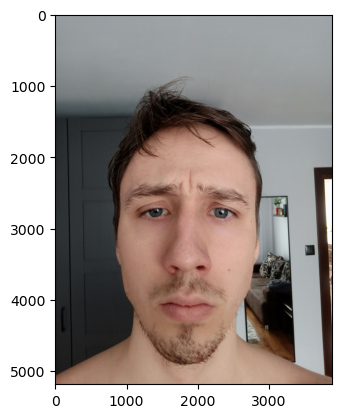

In [ ]:
RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB)


In [ ]:
def assign_class(class_dict, number):
    if number in class_dict.values():
        for name, class_number in class_dict.items():
            if class_number == number:
                return name
    else:
        return number

In [ ]:
assign_class(class_dict,predicted_value)

'Ronaldo'

Create new models to compare, also using DL

Model performance analisis

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        18

    accuracy                           0.98        44
   macro avg       0.98      0.95      0.97        44
weighted avg       0.98      0.98      0.98        44



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pipe.predict(X_test))
cm

array([[19,  0,  0],
       [ 1,  6,  0],
       [ 0,  0, 18]], dtype=int64)

In [ ]:
# !pip install joblib
import joblib
joblib.dump (pipe,"Saved_model.pkl")

['Saved_model.pkl']

In [ ]:
import json 
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))